In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import yfinance as yf

In [53]:
ACCION = 'AAPL'

def get_data(ticker):
    stock_data = yf.download(ticker)
    return stock_data

In [54]:
stock = get_data(ACCION)
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000


In [55]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10975 entries, 1980-12-12 to 2024-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10975 non-null  float64
 1   High       10975 non-null  float64
 2   Low        10975 non-null  float64
 3   Close      10975 non-null  float64
 4   Adj Close  10975 non-null  float64
 5   Volume     10975 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 600.2 KB


In [56]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [57]:
stock = stock.reset_index()

In [58]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10975 entries, 0 to 10974
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10975 non-null  datetime64[ns]
 1   Open       10975 non-null  float64       
 2   High       10975 non-null  float64       
 3   Low        10975 non-null  float64       
 4   Close      10975 non-null  float64       
 5   Adj Close  10975 non-null  float64       
 6   Volume     10975 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 600.3 KB


In [59]:
stock['Adj Close'].unique()

array([9.90577489e-02, 9.38898399e-02, 8.69985223e-02, ...,
       2.08139999e+02, 2.09070007e+02, 2.13250000e+02])

In [60]:
stock.drop(columns='Adj Close', inplace=True)

In [61]:
stock.describe().round(2)

,Open,High,Low,Close,Volume
count,10975.00,10975.00,10975.00,10975.00,1.097500e+04
mean,21.88,22.11,21.65,21.89,3.186347e+08
std,45.11,45.60,44.67,45.15,3.355847e+08
min,0.05,0.05,0.05,0.05,0.000000e+00
25%,0.30,0.30,0.29,0.30,1.136084e+08
50%,0.53,0.54,0.52,0.53,2.061528e+08
75%,20.03,20.20,19.77,19.97,3.990434e+08
max,217.59,220.20,213.00,216.67,7.421641e+09


In [62]:
num_duplicates = stock.duplicated(subset=['Date']).sum()
print(f"Número de filas duplicadas en la columna 'Date': {num_duplicates}")

Número de filas duplicadas en la columna 'Date': 0


In [63]:
stock.set_index('Date', inplace = True)

In [64]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [65]:
stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-20,213.929993,214.240005,208.850006,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,66213200


In [66]:
apple_stock =stock.drop(columns='Volume')
volume = stock['Volume']

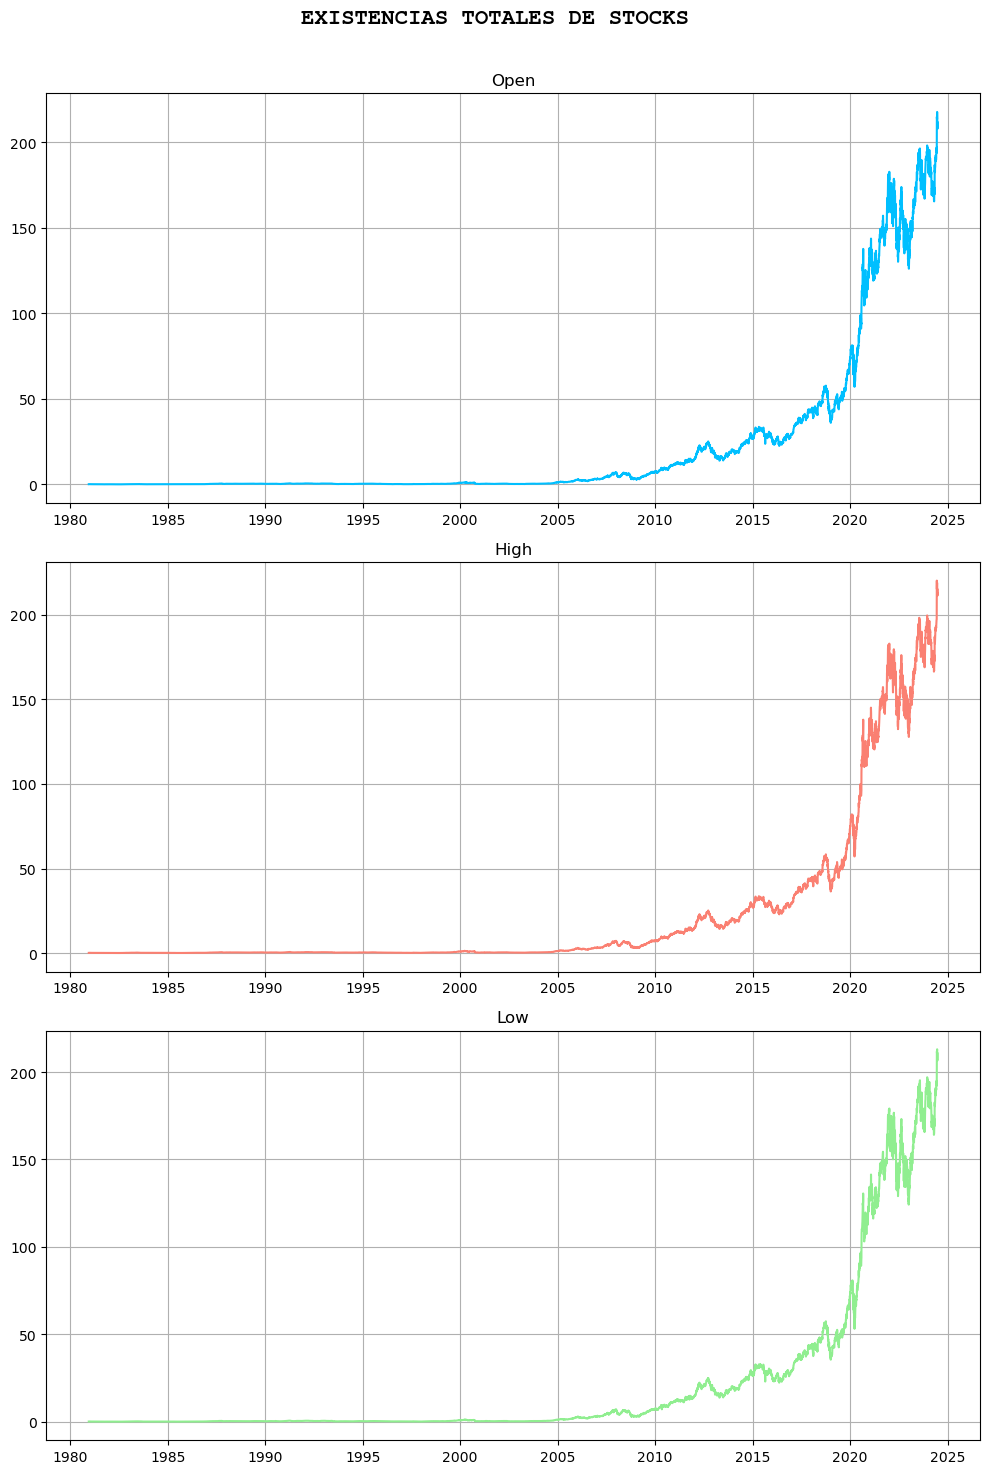

In [68]:
# Crear la figura y los subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Subplot 1: Open
axs[0].plot(apple_stock.index, apple_stock['Open'], color='deepskyblue', label='Open')
axs[0].set_title('Open')
axs[0].grid(True)

# Subplot 2: High
axs[1].plot(apple_stock.index, apple_stock['High'], color='salmon', label='High')
axs[1].set_title('High')
axs[1].grid(True)

# Subplot 3: Low
axs[2].plot(apple_stock.index, apple_stock['Low'], color='lightgreen', label='Low')
axs[2].set_title('Low')
axs[2].grid(True)

# Configuración general
fig.suptitle('EXISTENCIAS TOTALES DE STOCKS', fontsize=16, fontfamily='Courier New', fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.97])

# Mostrar el gráfico
plt.show()